# Exercici 1

Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

Make at least three different regression models to try to predict DelayedFlights.csv's flight delay (ArrDelay) as best as possible.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("DelayedFlights.csv", index_col = 0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


The data consists of flight arrival and departure details for all commercial flights within the USA. Variable descriptions:
* 1 Year; 2008 
* 2 Month; 1-12 
* 3 DayofMonth; 1-31 
* 4 DayOfWeek; 1 (Monday) - 7 (Sunday) 
* 5 DepTime; actual departure time (local, hhmm) 
* 6 CRSDepTime; scheduled departure time (local, hhmm) 
* 7 ArrTime; actual arrival time (local, hhmm) 
* 8 CRSArrTime; scheduled arrival time (local, hhmm) 
* 9 UniqueCarrier; unique carrier code 
* 10 FlightNum; flight number 
* 11 TailNum; plane tail number 
* 12 ActualElapsedTime; in minutes 
* 13 CRSElapsedTime; in minutes 
* 14 AirTime; in minutes 
* 15 ArrDelay; arrival delay, in minutes 
* 16 DepDelay; departure delay, in minutes 
* 17 Origin; origin IATA airport code 
* 18 Dest; destination IATA airport code 
* 19 Distance; in miles 
* 20 TaxiIn; taxi in time, in minutes 
* 21 TaxiOut; taxi out time in minutes 
* 22 Cancelled; was the flight cancelled? 
* 23 CancellationCode; reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 
* 24 Diverted; 1 = yes, 0 = no 
* 25 CarrierDelay; in minutes 
* 26 WeatherDelay; in minutes 
* 27 NASDelay; in minutes 
* 28 SecurityDelay; in minutes 
* 29 LateAircraftDelay; in minutes

In [7]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


We are first deleting some columns that are not needed. The Year column, that is always 2008; the Cancelled column, as well as the rows that have cancelled = 1, because those are of no interest if we are studying delay; the CancellationCode column, for the same reasons; the Diverted column, as well as the rows that have diverted = 1, because those are of no interest if we are studying delay; and the Origin and Dest because they add no real information that the column Distance doesn't provide, as well as the TailNum column.

In [3]:
#remove the Year column
df = df.drop(["Year"], axis = 1)

#keep only rows that were not cancelled
df = df[df.Cancelled == 0]

#remove the Cancelled row
df = df.drop(["Cancelled"], axis = 1)

#remove CancellationCode column
df = df.drop(["CancellationCode"], axis = 1)

#keep only rows that were not diverted
df = df[df.Diverted == 0]

#remove the Diverted row
df = df.drop(["Diverted"], axis = 1)

#remove the Origin, Dest, and TailNum row
df = df.drop(["Origin", "Dest", "TailNum"], axis = 1)

In [11]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,128.0,...,-14.0,8.0,810,4.0,8.0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,WN,3231,128.0,...,2.0,19.0,810,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,WN,448,96.0,...,14.0,8.0,515,3.0,17.0,NaN,NaN,NaN,NaN,NaN
4,1,3,4,1829.0,1755,1959.0,1925,WN,3920,90.0,...,34.0,34.0,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
5,1,3,4,1940.0,1915,2121.0,2110,WN,378,101.0,...,11.0,25.0,688,4.0,10.0,NaN,NaN,NaN,NaN,NaN


Since we want to predict arrival delay (ArrDelay) as best as possible, we will study its correlation to the other variables so that we can pick the best for it.

[Text(0.5, 1, 'Correlations')]

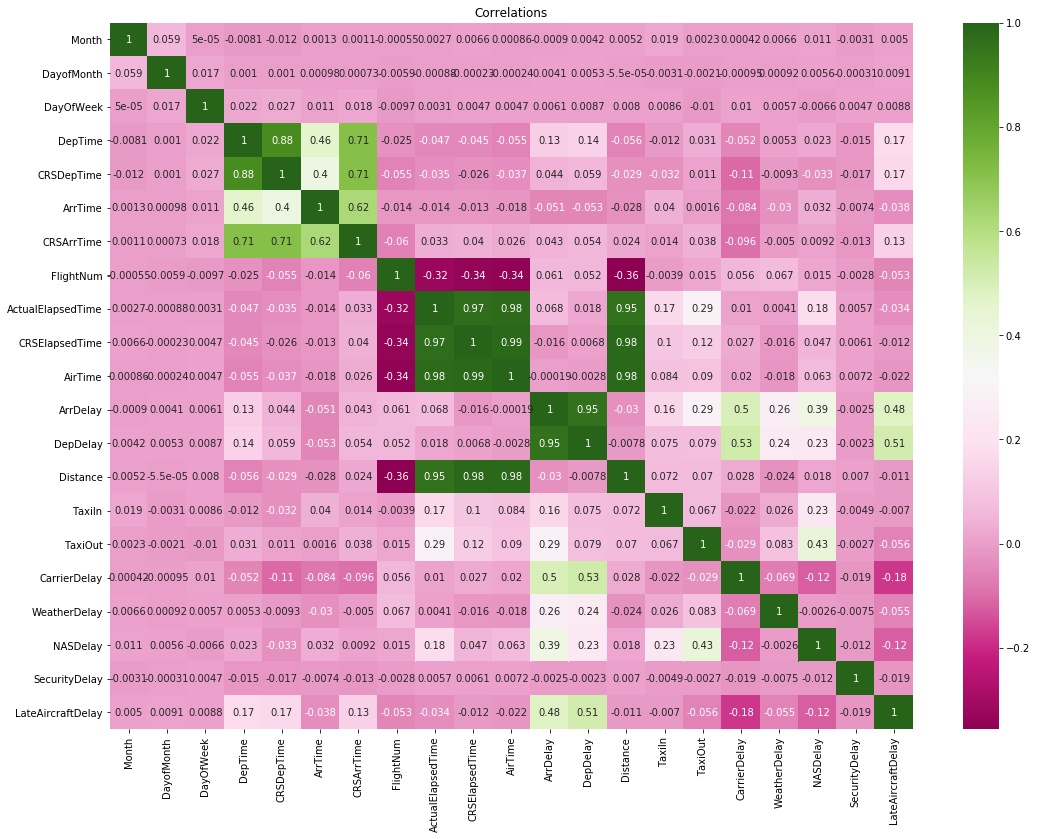

In [15]:
plt.figure(figsize = (18, 13))
sns.heatmap(df.corr(), annot = True, cmap = "PiYG").set(
    title = "Correlations")

As the above graph shows, DepDelay (departure delay) is the most strongly correlated to ArrDelay, with a correlation coefficient of 0.95, so we will pick this atribute to predict arrival delay.

Since we have this correlation coefficient that shows linear correlation between these two values, we will begin by making a linear regression model in SKLearn. We will also take a sample of 10% of the dataset, since its large size would make the following calculations take too long. 

In [4]:
#making a sample of 10% of the dataset
random_df = df.sample(frac = 0.1, random_state = 42)

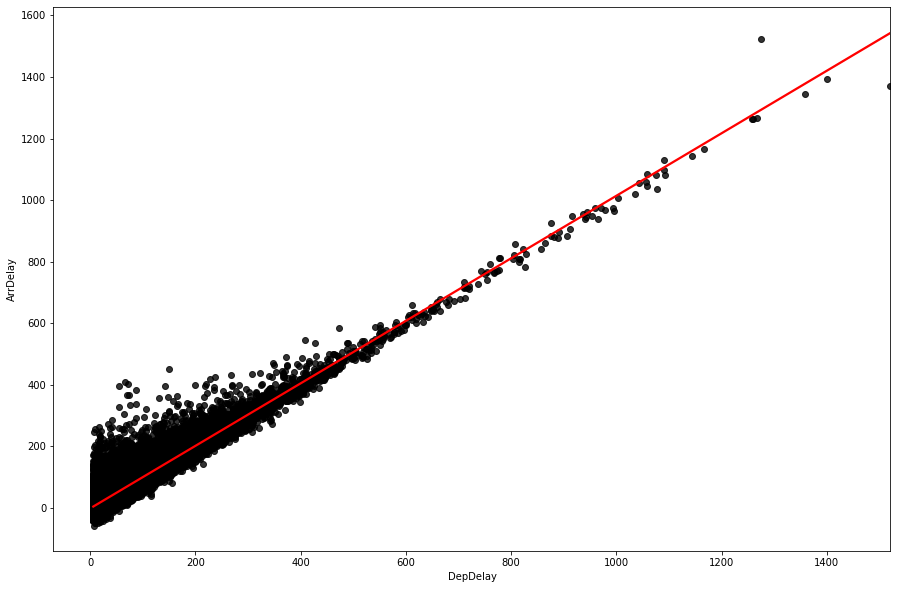

In [8]:
plt.figure(figsize = (15, 10))
sns.regplot(x = random_df.DepDelay, y = random_df.ArrDelay, line_kws={"color": "red"}, scatter_kws={"color": "black"})

Linear regression is one of the simplest regression methods. It is used to establish a relationship between two or more variables, one of which is dependent on the other(s). In the example above, we are graphing how the dependent variable, ArrDelay, is related to the independent variable, DepDelay. The line plotted is the predicted response made by the simple linear regression.

In [52]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

x = random_df[["DepDelay"]]
y = random_df[["ArrDelay"]]

lmodel = lm.fit(x, y)
y_pred = lm.predict(x)

In [6]:
#MSE for the linear regression model
from sklearn.metrics import mean_squared_error
msel = mean_squared_error(random_df.ArrDelay, y_pred)
print("Mean squared error of the linear model:", msel)

Mean squared error of the linear model: 297.99528259317736


In [7]:
#R2 for the simple linear regression model
rl = lm.score(x,y)
print("R squared of the linear model:", rl)

R squared of the linear model: 0.9085088811755188


Next, we will try a decision tree to make our model. It works by making yes or no decisions, and instead of calculating the value on a continuous scale, it arrives at set end nodes.

In [9]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0)

dtmodel = dt.fit(x,y)
y_pred_dt = dt.predict(x)

In [11]:
#MSE for the decision tree regression model
msedt = mean_squared_error(random_df.ArrDelay, y_pred_dt)
print("Mean squared error of the decision tree model:", msedt)

Mean squared error of the decision tree model: 295.77562064246104


In [12]:
#R2 for the decision tree regression model
rdt = dt.score(x,y)
print("R squared of the decision tree model:", rdt)

R squared of the decision tree model: 0.9091903663101691


LASSO regression is a regression technique that is best used for data that shows heavy multicollinearity, that is that there is heavy correlation of features between each other. Its name is an acronym of Least Absolute Shrinkage and Selection Operator, and it uses a process in which data values are shrunk towards a central point, like the mean. 

In [56]:
from sklearn.linear_model import LassoCV
lasso = LassoCV()
lasso.fit(x, y)
y_pred_l = lasso.predict(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
#MSE for the LASSO regression model
mselasso = mean_squared_error(random_df.ArrDelay, y_pred_l)
print("Mean squared error of the LASSO model:", mselasso)

Mean squared error of the LASSO model: 297.99824169307976


In [58]:
#R2 for the LASSO regression model
rlasso = lasso.score(x, y)
print("R squared of the LASSO model:", rlasso)

R squared of the LASSO model: 0.9085079726666376


# Exercici 2

Compara’ls en base al MSE i al R2.

Compare them based on their MSE and R2.

R2 measures how much of of the variance for the dependent variable is explained by the model. It is the square of the correlation coefficient (R), hence its name. Its value falls between 0 and 1, and the higher, the better the fit. However, it is unsuitable to see if there is overfitting. Mean Square Error (MSE) gives an absolute measure of the goodness for the fit, so it can be used for that. It gives an absolute value on how much the predicted results deviate from the actual number, so it is not very useful by itself, but it can be used to compare against other models to help select the best one, which would be the one with the smallest MSE.

In this case we get very good results with the three models, but the decision tree model is slightly better, with an R2 of 0.909, compared to 0.908 on the other two models, and an MSE of 295.78, compared to 298 on the other two.

# Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

Train them using the different parameters they admit.

In [20]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [26]:
# https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
from sklearn.model_selection import RepeatedKFold, GridSearchCV

# cross validator
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 42)

#dictionary of search space
space = dict()
space['copy_X'] = [True, False]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

search = GridSearchCV(LinearRegression(), space, scoring = 'neg_mean_absolute_error', n_jobs = -1, cv = cv)

result = search.fit(x, y)

print('Best Hyperparameters: ', result.best_params_)

Best Hyperparameters:  {'copy_X': True, 'fit_intercept': True, 'normalize': False}


Since those hyperparameters settings are the default ones, we will change them to see how much it affects accuracy on our model.

In [32]:
#remaking the linear regression model
lm = linear_model.LinearRegression(copy_X = False, fit_intercept = False, normalize = True)

lmodel2 = lm.fit(x, y)
y_pred2 = lm.predict(x)

In [33]:
#MSE for the linear regression model
msel2 = mean_squared_error(random_df.ArrDelay, y_pred2)
print("Mean squared error of the linear model:", msel2)
#R2 for the linear regression model
rl2 = lm.score(x,y)
print("R squared of the linear model:", rl2)

Mean squared error of the linear model: 299.4321432694212
R squared of the linear model: 0.9080677332831077


As seen above, both MSE and R2 get slightly worse.

In [34]:
DecisionTreeRegressor().get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [43]:
#dictionary of search space
space = dict()
space['criterion'] = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
space['max_features'] = ["auto", "sqrt", "log2", None]
space['splitter'] = ["best", "random"]

search = GridSearchCV(DecisionTreeRegressor(), space, scoring = 'r2', n_jobs = -1, cv = cv)

result = search.fit(x, y)

print('Best Hyperparameters: ', result.best_params_)

Best Hyperparameters:  {'criterion': 'friedman_mse', 'max_features': 'auto', 'splitter': 'random'}


We will change the above paramteres to see if we can improve our model, taking into account that this one was the best out of the three we tried.

In [44]:
dt = DecisionTreeRegressor(random_state = 0, criterion = "friedman_mse", max_features = "auto", splitter = "random")

dtmodel2 = dt.fit(x,y)
y_pred_dt2 = dt.predict(x)

In [45]:
#MSE for the decision tree regression model
msedt2 = mean_squared_error(random_df.ArrDelay, y_pred_dt)
print("Mean squared error of the second decision tree model:", msedt2)
#R2 for the decision tree regression model
rdt2 = dt.score(x,y)
print("R squared of the second decision tree model:", rdt2)
print("Mean squared error of the first decision tree model:", msedt)
print("R squared of the first decision tree model:", rdt)

Mean squared error of the second decision tree model: 295.77562064246104
R squared of the second decision tree model: 0.9091903663101691
Mean squared error of the first decision tree model: 295.77562064246104
R squared of the first decision tree model: 0.9091903663101691


It seems that there is no change in this model when changing these parameters. Let's see if changing the grid search to take into account MSE instead of R2 changes the metrics.

In [47]:
search = GridSearchCV(DecisionTreeRegressor(), space, scoring = 'neg_mean_squared_error', n_jobs = -1, cv = cv)
result = search.fit(x, y)

print('Best Hyperparameters: ', result.best_params_)

Best Hyperparameters:  {'criterion': 'friedman_mse', 'max_features': 'sqrt', 'splitter': 'random'}


In [48]:
dt = DecisionTreeRegressor(random_state = 0, criterion = "friedman_mse", max_features = "sqrt", splitter = "random")

dtmodel2 = dt.fit(x,y)
y_pred_dt2 = dt.predict(x)

#MSE for the decision tree regression model
msedt2 = mean_squared_error(random_df.ArrDelay, y_pred_dt)
print("Mean squared error of the second decision tree model:", msedt2)
#R2 for the decision tree regression model
rdt2 = dt.score(x,y)
print("R squared of the second decision tree model:", rdt2)
print("Mean squared error of the first decision tree model:", msedt)
print("R squared of the first decision tree model:", rdt)

Mean squared error of the second decision tree model: 295.77562064246104
R squared of the second decision tree model: 0.9091903663101691
Mean squared error of the first decision tree model: 295.77562064246104
R squared of the first decision tree model: 0.9091903663101691


There is still no observable change. Since our original results are fairly good, this is not a big issue.

In [50]:
LassoCV().get_params().keys()

dict_keys(['alphas', 'copy_X', 'cv', 'eps', 'fit_intercept', 'max_iter', 'n_alphas', 'n_jobs', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'verbose'])

In [62]:
#dictionary of search space
space = dict()
space['copy_X'] = [True, False]
space['fit_intercept'] = [True, False]
space['positive'] = [True, False]
space['selection'] = ["cyclic", "random"]

search = GridSearchCV(LassoCV(), space, scoring = 'neg_mean_squared_error', n_jobs = -1, cv = cv)

result = search.fit(x, y)

print('Best Hyperparameters:', result.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'positive': True, 'selection': 'cyclic'}


We will change the hyperparameters on the LassoCV function according to grid search, in order to improve the model.

In [63]:
lasso = LassoCV(copy_X = True, fit_intercept = True, positive = True, selection = "cyclic")
lasso.fit(x, y)
y_pred_l2 = lasso.predict(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
#MSE for the LASSO regression model
mselasso2 = mean_squared_error(random_df.ArrDelay, y_pred_l2)
print("Mean squared error of the LASSO model:", mselasso)
#R2 for the LASSO regression model
rlasso2 = lasso.score(x, y)
print("R squared of the LASSO model:", rlasso)

Mean squared error of the LASSO model: 297.99824169307976
R squared of the LASSO model: 0.9085079726666376


In this case too there seems to not be any improvement or decline when changing the hyperparameters. In this case, only the parameter "positive" is different from the default, but still some difference was expected. Perhaps the change is so negligible that it does not even show up in fourteen decimal figures.

# Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

Compare their performance using train/test or using all the data (cross validation).

In [ ]:
from sklearn.model_selection import train_test_split
#train, test = train_test_split(df, test_size = 0.3, random_state = 42)


X_train, X_test, y_train, y_test = train_test_split(random_df[list_of_x_cols], random_df[y_col], test_size = 0.2)


y = df.pop('output')
X = df
X_train, X_test, y_train, y_test = train_test_split(X.index, y, test_size=0.2)